In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
style.use('seaborn-notebook')

In [3]:
df0 = pd.read_csv('../data/Default.csv')

In [4]:
df0.shape

(10000, 5)

In [5]:
df0['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
df = df0.groupby('default', group_keys=False).apply(lambda x: x.sample(min(len(x), 333)))

In [7]:
df['default'].value_counts()

Yes    333
No     333
Name: default, dtype: int64

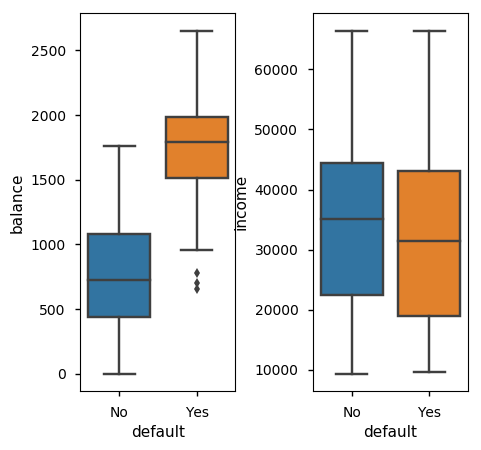

In [8]:
fig = plt.figure(figsize=(5,5), dpi=100)
fig.subplots_adjust(wspace=0.5)
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(data=df, x='default', y='balance', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=df, x='default', y='income', ax=ax2)
plt.show()

---

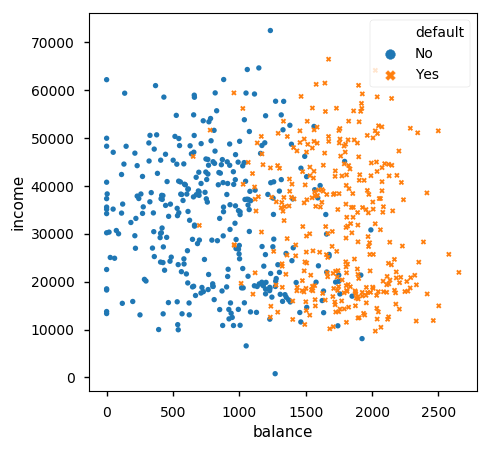

In [9]:
markers = {"No": "o", "Yes": "X"}
fig = plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x='balance', y='income', style='default',
                markers=markers, edgecolor='None', s=15, hue='default')
plt.show()

In [10]:
df['default0'] = 0.0
df.loc[df['default']=='Yes', 'default0'] = 1.0

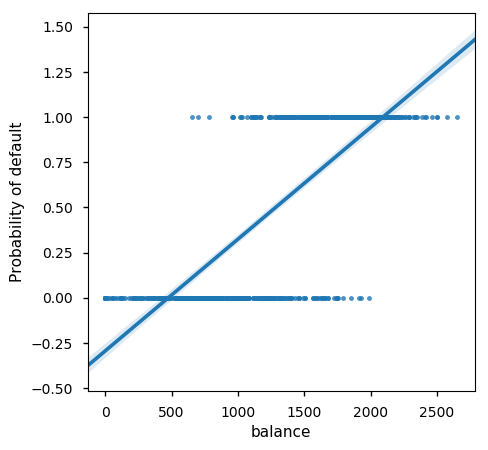

In [11]:
markers = {0.0: "o", 1.0: "X"}
fig = plt.figure(figsize=(5,5), dpi=100)
sns.regplot(data=df, x='balance', y='default0', marker='.')
plt.ylabel('Probability of default')
plt.show()

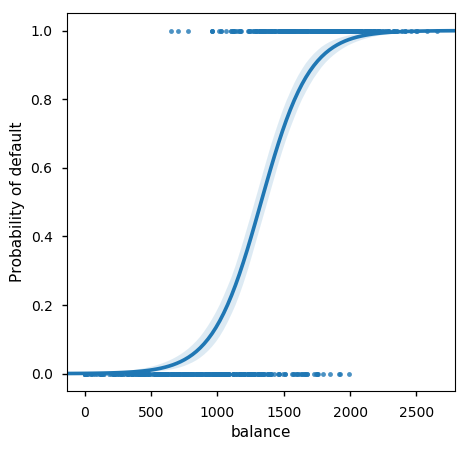

In [12]:
markers = {0.0: "o", 1.0: "X"}
fig = plt.figure(figsize=(5,5), dpi=100)
sns.regplot(data=df, x='balance', y='default0', marker='.', logistic=True)
plt.ylabel('Probability of default')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lrest = LogisticRegression(solver='liblinear')

In [15]:
X = df[['balance']].values.reshape(-1, 1)
y = df[['default']].values.reshape(-1, )

In [16]:
lrest.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
print('logit = {:.6f}x + {:.5f}'.format(lrest.coef_[0,0], lrest.intercept_[0]))

logit = 0.004264x + -5.54222


In [18]:
xtest = [[1000], [2000]]

In [19]:
lrest.predict(xtest)

array(['No', 'Yes'], dtype=object)

In [20]:
lrest.predict_proba(xtest)

array([[0.78207826, 0.21792174],
       [0.04803576, 0.95196424]])

In [21]:
lrest.classes_

array(['No', 'Yes'], dtype=object)

In [22]:
xtest2 = np.arange(0,3000,1).reshape(-1,1)
xtest2.shape

(3000, 1)

In [23]:
ytest2 = lrest.predict_proba(xtest2)

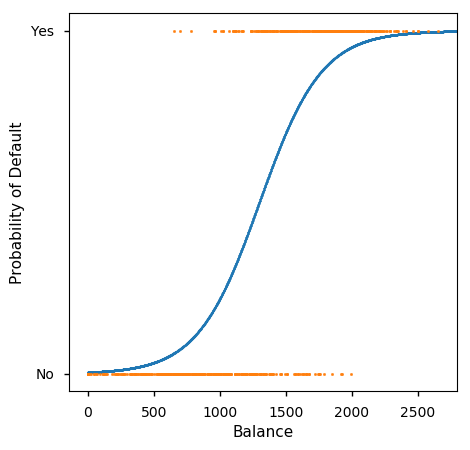

In [24]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(list(xtest2), list(ytest2[:,1]), s=1)
plt.scatter(X, y, s=3)
plt.ylabel('Probability of Default')
plt.xlabel('Balance')
plt.show()